In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
def dist(z):
    omega_m = 0.315
    omega_r = 8.24*(10**-5)
    c = 2.998*(10.0**5.0)
    h0 = 70.0
    a = (4.0*omega_r)+(3.0*omega_m)
    b = (6.0*omega_r)+(3.0*omega_m)
    distance = (c/h0)*(z - (a/4.0)*(z**2) + (1.0/3.0)*((3.0*(a**2)/8.0) - (b/2.0))*(z**3))
    return distance

# ACT clusters

In [3]:
cluster_catalog = fits.open('../data/cmb/act_clusters.fits', memmap=True)

In [4]:
cluster_table = Table(cluster_catalog[1].data)

In [5]:
ra_arr = cluster_table['RADeg']
dec_arr = cluster_table['decDeg']
z_arr = cluster_table['redshift']

In [7]:
# convert to cartesian coordinates
x_cart_arr = np.zeros(len(ra_arr))
y_cart_arr = np.zeros(len(ra_arr))
z_cart_arr = np.zeros(len(ra_arr))
for i in range(len(ra_arr)):
    dist_val = dist(z_arr[i])
    x_i = dist_val*np.cos(np.radians(ra_arr[i]))*np.cos(np.radians(dec_arr[i]))
    y_i = dist_val*np.sin(np.radians(ra_arr[i]))*np.cos(np.radians(dec_arr[i]))
    z_i = dist_val*np.sin(np.radians(dec_arr[i]))
    x_cart_arr[i] = x_i
    y_cart_arr[i] = y_i
    z_cart_arr[i] = z_i

# Planck Clusters

In [8]:
f = open('../data/cmb/planck_clusters.txt', 'r')
z_planck_vals = []
ra_planck_vals = []
dec_planck_vals = []
for line in f:
    values = line.split('|')
    if values[7].strip() != "":
        z_planck_vals.append(float(values[7]))
        ra_val_arr = values[3].split()
        ra_val = (float(ra_val_arr[0])*15.) + (float(ra_val_arr[1])/4.) + (float(ra_val_arr[2])/240.)
        ra_planck_vals.append(ra_val)
        dec_val_arr = values[4].split()
        if float(dec_val_arr[0])>0:
            dec_val = (float(dec_val_arr[0])) + (float(dec_val_arr[1])/60.) + (float(dec_val_arr[2])/3600.)
        else:
            dec_val = (float(dec_val_arr[0])) - (float(dec_val_arr[1])/60.) - (float(dec_val_arr[2])/3600.)
        dec_planck_vals.append(dec_val) 

In [9]:
x_planck_arr = np.zeros(len(z_planck_vals))
y_planck_arr = np.zeros(len(z_planck_vals))
z_planck_arr = np.zeros(len(z_planck_vals))
for i in range(len(z_planck_vals)):
    dist_val = dist(z_planck_vals[i])
    x_i = dist_val*np.cos(np.radians(ra_planck_vals[i]))*np.cos(np.radians(dec_planck_vals[i]))
    y_i = dist_val*np.sin(np.radians(ra_planck_vals[i]))*np.cos(np.radians(dec_planck_vals[i]))
    z_i = dist_val*np.sin(np.radians(dec_planck_vals[i]))
    x_planck_arr[i] = x_i
    y_planck_arr[i] = y_i
    z_planck_arr[i] = z_i

# SPT Clusters

In [10]:
spt_cluster_catalog = fits.open('../data/cmb/spt_clusters.fits', memmap=True)
spt_cluster_table = Table(spt_cluster_catalog[1].data)
# print(spt_cluster_catalog[1].columns)

In [11]:
spt_ra_arr = spt_cluster_table['RA']
spt_dec_arr = spt_cluster_table['DEC']
spt_z_arr = spt_cluster_table['REDSHIFT']

In [12]:
spt_x_cart_arr = np.zeros(len(spt_ra_arr))
spt_y_cart_arr = np.zeros(len(spt_ra_arr))
spt_z_cart_arr = np.zeros(len(spt_ra_arr))
for i in range(len(spt_ra_arr)):
    dist_val = dist(spt_z_arr[i])
    x_i = dist_val*np.cos(np.radians(spt_ra_arr[i]))*np.cos(np.radians(spt_dec_arr[i]))
    y_i = dist_val*np.sin(np.radians(spt_ra_arr[i]))*np.cos(np.radians(spt_dec_arr[i]))
    z_i = dist_val*np.sin(np.radians(spt_dec_arr[i]))
    spt_x_cart_arr[i] = x_i
    spt_y_cart_arr[i] = y_i
    spt_z_cart_arr[i] = z_i

Text(0.5, 0, 'z (Mpc)')

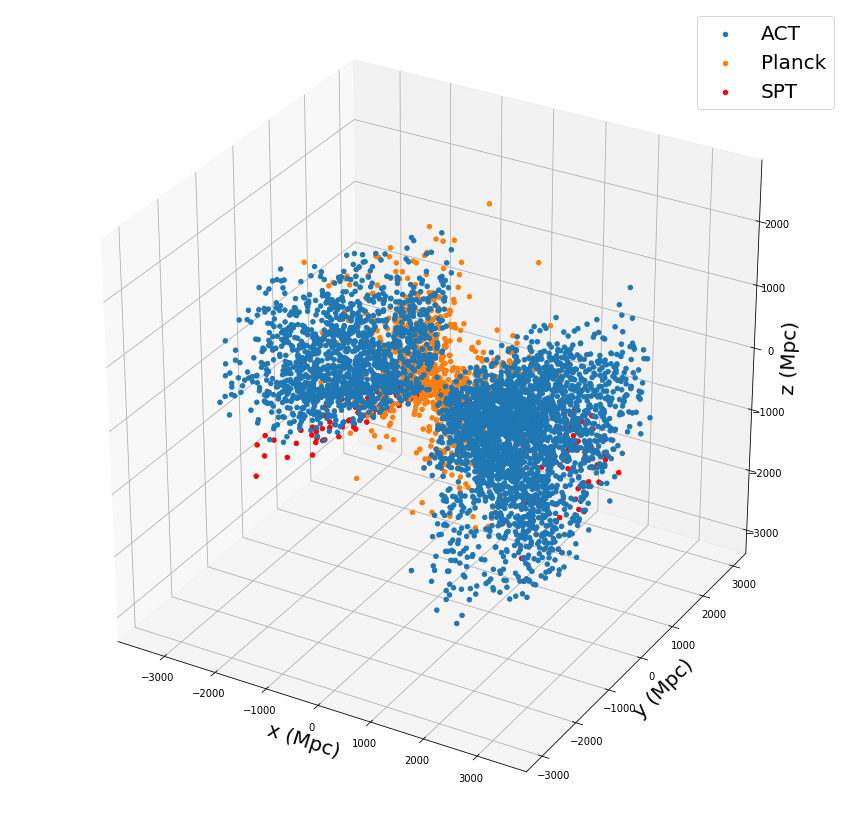

In [13]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
act_plt = ax.scatter(x_cart_arr, y_cart_arr, z_cart_arr, alpha=1.0, s=20, label='ACT')
planck_plt = ax.scatter(x_planck_arr, y_planck_arr, z_planck_arr, alpha=1.0, label='Planck')
spt_plt = ax.scatter(spt_x_cart_arr, spt_y_cart_arr, spt_z_cart_arr, alpha=1.0, s=20, color='r', label='SPT')
ax.legend(fontsize=20)
ax.set_xlabel('x (Mpc)', fontsize=20)
ax.set_ylabel('y (Mpc)', fontsize=20)
ax.set_zlabel('z (Mpc)', fontsize=20)
# for rate in [0.1 * x for x in range(10, -1, -1)]:
#     planck_plt.set_alpha(rate)
#     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.pause(1.0)
# for rate in [0.1 * x for x in range(0, 11, 1)]:
#     planck_plt.set_alpha(rate)
#     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# for rate in [0.1 * x for x in range(10, -1, -1)]:
#     act_plt.set_alpha(rate)
#     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.pause(1.0)
# for rate in [0.1 * x for x in range(0, 11, 1)]:
#     act_plt.set_alpha(rate)
#     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# for rate in [0.1 * x for x in range(10, -1, -1)]:
#     act_plt.set_alpha(rate)
#     planck_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.pause(1.0)
# for rate in [0.1 * x for x in range(0, 11, 1)]:
#     act_plt.set_alpha(rate)
#     planck_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.ioff()
# fig.show()
